In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e12/sample_submission.csv
/kaggle/input/playground-series-s4e12/train.csv
/kaggle/input/playground-series-s4e12/test.csv


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("train.csv")
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [6]:
data.drop("id",axis=1,inplace=True)
data.shape

(1200000, 20)

In [7]:
data.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

<Axes: >

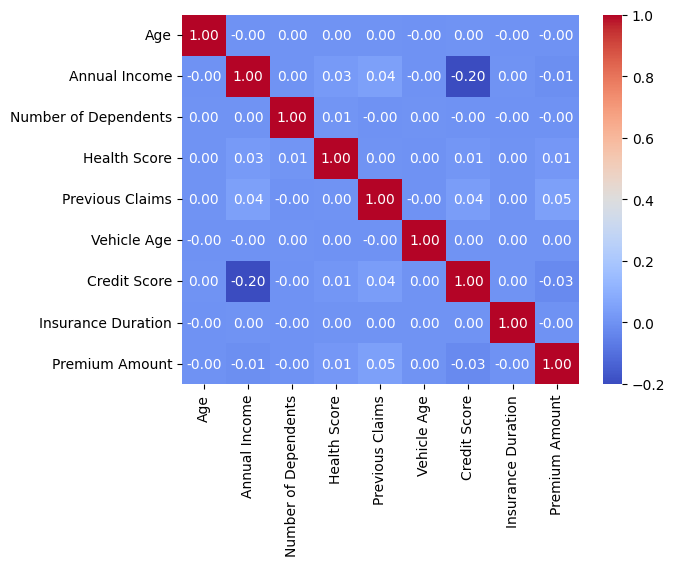

In [9]:
sns.heatmap(data.corr(numeric_only=True),annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

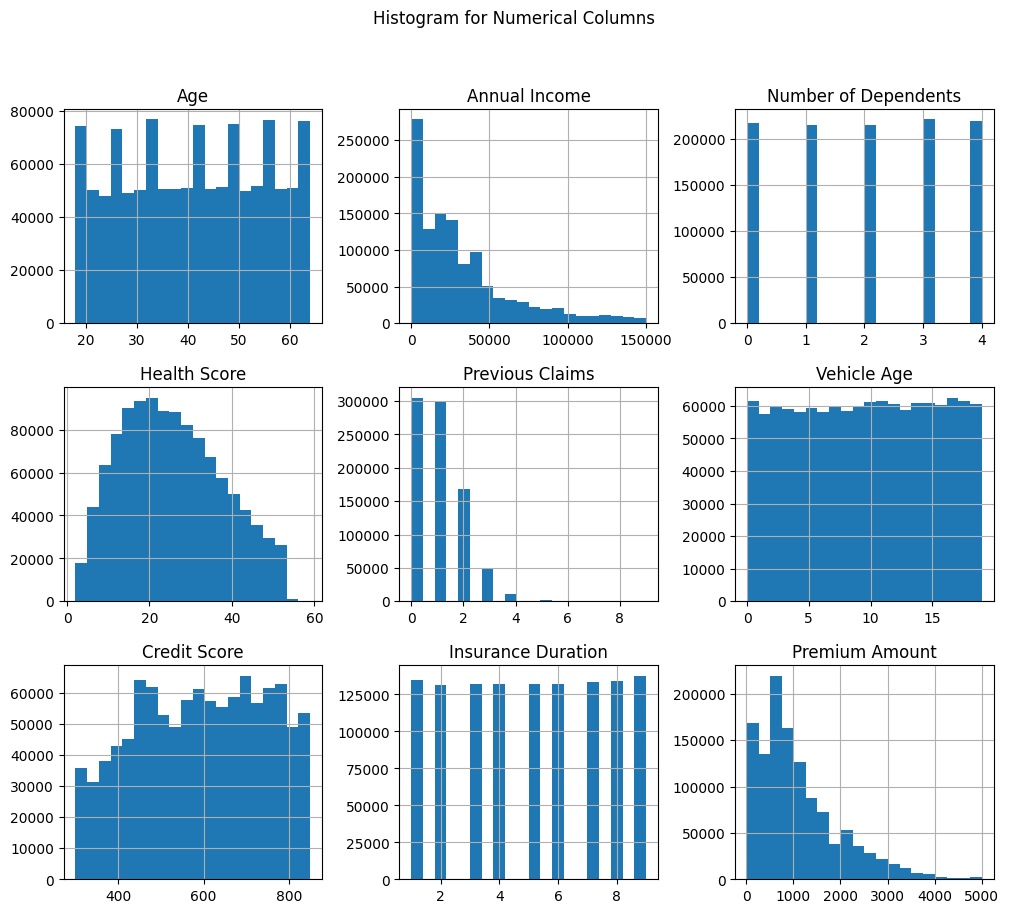

In [10]:
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogram for Numerical Columns")
plt.show()

In [11]:
data.isna().sum()

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

In [15]:
data["Education Level"].value_counts()

Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

[]

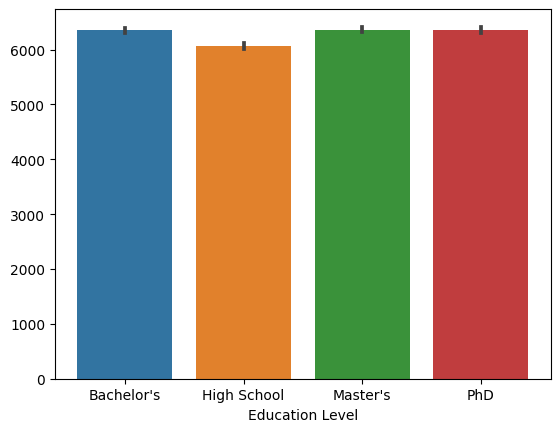

In [16]:
pivot1=pd.pivot_table(data,index="Age",columns="Education Level",values="Premium Amount",aggfunc="count")
sns.barplot(pivot1)
plt.plot()


From above graph it is clearly seen that the High school on an average takes less Premium amount compared to Bachelors Phd Masters 

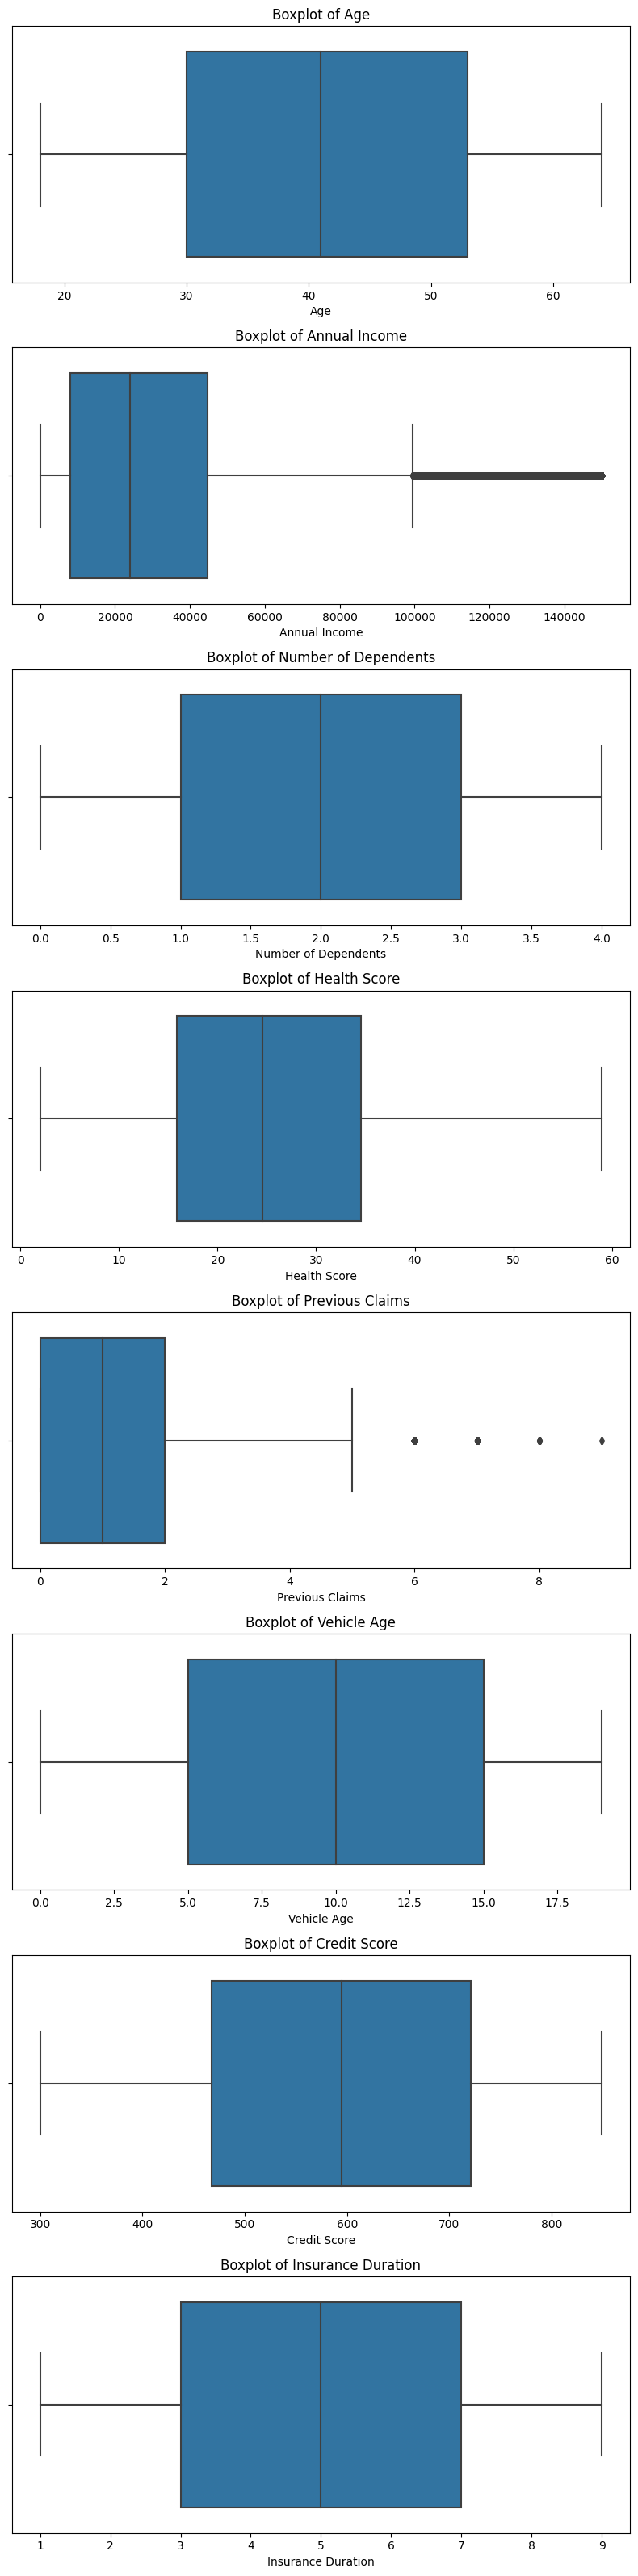

In [17]:
num_col=data.drop("Premium Amount",axis=1).select_dtypes(include=['float64']).columns
cat_col=data.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(nrows=len(num_col), ncols=1, figsize=(8, len(num_col) * 4))  # Create subplots

# Loop through numerical columns and plot each on a separate subplot
for ax, col in zip(axes, num_col):
    sns.boxplot(x=data[col], ax=ax)  # Plot on the corresponding axis
    ax.set_title(f"Boxplot of {col}")  # Set title for each subplot

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Function for Calculating and Replacing Outliers

In [18]:
# Here we will be calculating the Outliers and then limit with upperbound and lower bound
def calculate_iqr_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound
    
def replace_outliers(df, column, lower_bound, upper_bound):
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# following columns has outlier
1. Annual Income
2. Previous Claim

In [19]:
data.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [21]:
df=data.copy()

Extracting information like day, month and year from column Policy Start Date

In [22]:
df["Policy Start Date"]=pd.to_datetime(df['Policy Start Date'])
df["day"]=df["Policy Start Date"].dt.day_name()
# df["date"]=df["Policy Start Date"].dt.day
df["month"] = df["Policy Start Date"].dt.month
df["year"] = df["Policy Start Date"].dt.year
df.drop("Policy Start Date",axis=1,inplace =True)

In [23]:
# df["date"].unique()

# Model performed good when converted did sin transformation on year.

In [24]:
df['year_sin'] = np.sin(2 * np.pi * (df['year'] - 2019) / (2024 - 2019))
df.drop("year",axis=1,inplace=True)

In [25]:
num_col=df.drop("Premium Amount",axis=1).select_dtypes(include=['float64']).columns
cat_col=df.select_dtypes(include=['object']).columns


# Dividing Data into training and test data

In [26]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Premium Amount",axis=1),df["Premium Amount"],random_state=20,test_size=0.1)

In [28]:
np.unique(df["Health Score"])

array([ 2.01223718,  2.02441523,  2.03933827, ..., 58.88603451,
       58.97591405,         nan])

# Handling Outliers

In [251]:
# for balance column
lower_bound_train_income, upper_bound_train_income = calculate_iqr_bounds(X_train, 'Annual Income')
X_train = replace_outliers(X_train, 'Annual Income', lower_bound_train_income, upper_bound_train_income)
X_test=replace_outliers(X_test, 'Annual Income', lower_bound_train_income, upper_bound_train_income)
# for Previous Claims
lower_bound_train_previous, upper_bound_train_previous = calculate_iqr_bounds(X_train, 'Previous Claims')
X_train = replace_outliers(X_train, 'Previous Claims', lower_bound_train_income, upper_bound_train_income)
X_test=replace_outliers(X_test, 'Previous Claims', lower_bound_train_income, upper_bound_train_income)


# Creating a scorer for root_mean_squared_log_error 

In [252]:
def rmsle(y_true, y_pred):
    # Avoid log(0) by clipping predictions to a minimum value
    y_pred = np.clip(y_pred, 1e-10, None)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))
rmsle_scorer=make_scorer(rmsle,greater_is_better=False)


# Doing data preprocessing before model training

In [253]:
cat_col

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type', 'day'],
      dtype='object')

In [254]:
cat_pipe=Pipeline([
     # ("impute",SimpleImputer(strategy="constant",fill_value="missing")),
    ("ohe",OneHotEncoder()),
    ("scale",StandardScaler(with_mean=False))
])
num_pipe=Pipeline([#("impute",SimpleImputer(strategy="mean")),
                 ("scale",StandardScaler(with_mean=False))
                    
                  ])
ct=ColumnTransformer([
    ("num",num_pipe,num_col),
    ("cat",cat_pipe,cat_col)])
transformer=Pipeline([("ct",ct)
                      # ("model",LGBMRegressor())
])
transformed=transformer.fit_transform(X_train)                               

# Below function to provide parameter to objective

In [256]:
def rmsle_objective(y_true, y_pred):
    y_pred = np.maximum(0, y_pred)  # Ensure non-negativity
    grad = -1 / (y_pred + 1) * (np.log1p(y_true) - np.log1p(y_pred))
    hess = 1 / ((y_pred + 1) ** 2)
    return grad, hess

In [257]:
# model=LGBMRegressor(learning_rate=0.2,max_depth=-1,n_estimators=150,reg_alpha=0.5,reg_lambda=0.1,objective=rmsle_objective)
model=LGBMRegressor(objective=rmsle_objective) 
# model=XGBRegressor(objective=rmsle_objective,n_estimators=150,grow_policy='lossguide')
# Maximum depth of trees
# }
# model=GridSearchCV(estimator=LGBMRegressor(),param_grid=param_grid,cv=4,n_jobs=-1,scoring=rmsle_scorer)
model.fit(transformed,y_train)

[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 1080000, number of used features: 49
[LightGBM] [Info] Using self-defined objective function


LGBMRegressor(objective=<function rmsle_objective at 0x7c6b155a7ac0>)

In [258]:
y_pred=model.predict(transformer.transform(X_test))
rmsle(y_test,y_pred)

1.0431498142725026

In [259]:
# print(rmsle(y_train,model.predict(transformed)))
# model.best_params_
# output for Grid Search
# {'learning_rate': 0.2,
#  'max_depth': -1,
 # 'n_estimators': 150,
 # 'reg_alpha': 0.5, 
#  'reg_lambda': 0.1}


In [260]:
# grid.best_params_

In [261]:
# clustering=KMeans(n_clusters=2,random_state=42)
# X_train["cluster"]=clustering.fit_predict(X_train_transformed)
# # clustering.fit(X_train_transformed)

In [262]:
# for cluster_label in X_train["cluster"].unique():
#     cluster_data=X_train[X_train["cluster"]==cluster_label]
#     plt.scatter(
#         cluster_data["Age"][:100],cluster_data["Annual Income"][:100],
#         label=f'Cluster {cluster_label}', alpha=0.6
#     )
# plt.title('Cluster Visualization')
# plt.xlabel('Age')
# plt.ylabel('Annual Income')
# plt.legend()
# plt.grid()
# plt.show()

In [263]:
X_comp=pd.read_csv("test.csv")
# X_comp.drop("Policy Start Date",axis=1,inplace=True)
test_id=X_comp["id"]
X_comp.drop("id",axis=1,inplace=True)
X_comp["Policy Start Date"]=pd.to_datetime(X_comp['Policy Start Date'])
X_comp["day"]=X_comp["Policy Start Date"].dt.day_name()
# df["date"]=df["Policy Start Date"].dt.day
X_comp["month"] = X_comp["Policy Start Date"].dt.month
X_comp["year"] = X_comp["Policy Start Date"].dt.year
X_comp['year_sin'] = np.sin(2 * np.pi * (X_comp['year'] - 2019) / (2024 - 2019))
X_comp.drop("Policy Start Date",axis=1,inplace =True)
X_comp.drop("year",axis=1,inplace =True)
# X_comp.drop("month",axis=1,inplace =True)

X_comp=replace_outliers(X_comp, 'Annual Income', lower_bound_train_income, upper_bound_train_income)
X_comp=replace_outliers(X_comp, 'Previous Claims', lower_bound_train_previous, upper_bound_train_previous)
y_com_pred=model.predict(transformer.transform(X_comp))

In [264]:
submission=pd.DataFrame({
    "id":test_id,
    "Premium Amount":y_com_pred
    })
submission.to_csv("submission.csv",index=False)